In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from lib.preprocessing.load import read_movies_entrees
from sklearn.preprocessing import MultiLabelBinarizer
from lib.utils.io import read_from_json

In [126]:
def read_movies_features(path: str) -> pd.DataFrame:
    '''
    Read the movie features dataset 
    and casts it as an usable pandas DataFrame
    N.B: Fields that are not yet used are commented
    Parameters
    ----------
    path: str
        path to the dataset
    Returns
    -------
    df: pd.DataFrame
        Data as DataFrame
    '''
    features = read_from_json(path)
    features = [
        {
            "is_adult": item['adult'],
            "is_part_of_collection": not not item['belongs_to_collection'],
            "collection_name": item['belongs_to_collection']['name'] if item['belongs_to_collection'] != {} else None, # Currently simple bool, may be interesting to use a more complex feature later
            "budget": item['budget'],
            "genres": [ genre['name'] for genre in item['genres'] ], 
            "original_language": item['original_language'],
            "overview": item['overview'], # Not used yet. Blob of text
            "production_countries": [ country['iso_code'] for country in item['production_countries'] ],
            "languages": [ language['iso_code'] for language in item['languages'] ],
            "tagline": item['tagline'], # Not used yet. Blob of text
            "runtime": item['runtime'],
            "cast": item['cast'], # Not used yet. List of dicts with actor gender, name, id...
            "id": int(item['id'])
        } for item in features
    ]
    return pd.DataFrame(features)

# 1. Load data

In [127]:
# We first read the french movies "entrées"
bo = read_movies_entrees('data/french-box-office-29nov2020.json')
bo

,year,title,id,sales,release_date
0,2019,Le Roi Lion (2019),17528,3252896,2019-07-17
1,2019,Maléfique : Le Pouvoir du Mal,19073,786485,2019-10-16
2,2019,Nous finirons ensemble,18875,1261701,2019-05-01
3,2019,Spider-Man: Far from Home,18243,1370178,2019-07-03
4,2019,Jumanji: next level,18258,785636,2019-12-04
...,...,...,...,...,...
7494,2017,La Planète des Singes - Suprématie,15748,1016520,2017-08-02
7495,2017,Cars 3,16452,950353,2017-08-02
7496,2017,Le Sens de la fête,17386,808544,2017-10-04
7497,2017,Cinquante nuances plus sombres,15186,1618110,2017-02-08


In [128]:
# Then fetch their main features. Note that it seems not all movies were found in the feature database
features = read_movies_features('data/movie-features-29nov2020.json')
features

,is_adult,is_part_of_collection,collection_name,budget,genres,original_language,overview,production_countries,languages,tagline,runtime,cast,id
0,False,True,Maléfique - Saga,185000000,"[Fantastique, Familial, Aventure]",en,Cinq années après la conjuration de la malédic...,[US],[en],Aller au-delà du conte de fée.,110.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 1170...",19073
1,False,True,Les Petits Mouchoirs - Saga,0,"[Comédie, Drame]",fr,"Préoccupé, Max est parti dans sa maison au bor...","[BE, FR]",[fr],,135.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 3316...",18875
2,False,True,Spider-Man (Avengers) - Saga,160000000,"[Action, Aventure, Science-Fiction]",en,Peter et ses amis passent leurs vacances d’été...,[US],"[cs, nl, en, de, it]",Il est temps de passer à l'action.,129.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1136...",18243
3,False,True,Jumanji - Saga,125000000,"[Aventure, Comédie, Fantastique]",en,"L’équipe est de retour, mais le jeu a changé. ...",[US],[en],Bienvenue à Jumanji !,123.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1891...",18258
4,False,True,Dragons - Saga,129000000,"[Animation, Familial, Aventure]",en,Ce qui avait commencé comme une amitié improba...,"[JP, US]",[en],Une amitié légendaire,104.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 449,...",18167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7048,False,True,La Planète des Singes - Saga,150000000,"[Drame, Science-Fiction, Guerre]",en,César et les Singes sont contraints de mener u...,"[CA, US, NZ]",[en],Pour l'humanité. Pour l'espoir. Pour la planète.,142.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1333...",15748
7049,False,True,Cars - Saga,175000000,"[Aventure, Animation, Comédie, Familial]",en,Dépassé par une nouvelle génération de bolides...,[US],[en],La suite des aventures de Flash McQueen,109.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 887,...",16452
7050,False,False,None,17200000,[Comédie],fr,Max est traiteur depuis trente ans. Des fêtes ...,[FR],[fr],,117.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 2828...",17386
7051,False,True,Cinquante nuances - Saga,55000000,"[Drame, Romance]",en,Dépassée par les sombres secrets de Christian ...,[US],[en],,118.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 1185...",15186


In [130]:
# Let's merge both dataframes
data = pd.merge(bo, features, on='id')
data.head()

,year,title,id,sales,release_date,is_adult,is_part_of_collection,collection_name,budget,genres,original_language,overview,production_countries,languages,tagline,runtime,cast
0,2019,Maléfique : Le Pouvoir du Mal,19073,786485,2019-10-16,False,True,Maléfique - Saga,185000000,"[Fantastique, Familial, Aventure]",en,Cinq années après la conjuration de la malédic...,[US],[en],Aller au-delà du conte de fée.,110.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 1170..."
1,2019,Nous finirons ensemble,18875,1261701,2019-05-01,False,True,Les Petits Mouchoirs - Saga,0,"[Comédie, Drame]",fr,"Préoccupé, Max est parti dans sa maison au bor...","[BE, FR]",[fr],,135.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 3316..."
2,2019,Spider-Man: Far from Home,18243,1370178,2019-07-03,False,True,Spider-Man (Avengers) - Saga,160000000,"[Action, Aventure, Science-Fiction]",en,Peter et ses amis passent leurs vacances d’été...,[US],"[cs, nl, en, de, it]",Il est temps de passer à l'action.,129.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1136..."
3,2019,Jumanji: next level,18258,785636,2019-12-04,False,True,Jumanji - Saga,125000000,"[Aventure, Comédie, Fantastique]",en,"L’équipe est de retour, mais le jeu a changé. ...",[US],[en],Bienvenue à Jumanji !,123.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1891..."
4,2019,Dragons 3 : Le monde caché,18167,1224811,2019-02-06,False,True,Dragons - Saga,129000000,"[Animation, Familial, Aventure]",en,Ce qui avait commencé comme une amitié improba...,"[JP, US]",[en],Une amitié légendaire,104.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 449,..."


# 2. EDA

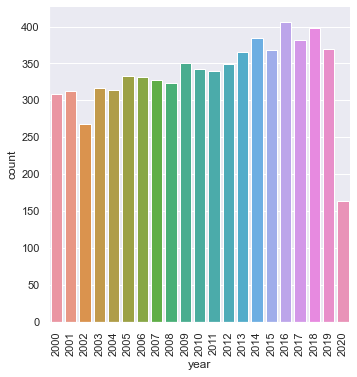

In [136]:
# Let's see the distribution of movies across years => rather uniform, 300 / 350 movies per year
import seaborn as sns
sns.set()
plot = sns.catplot(x="year", data=data, kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [137]:
# Let's explore our sales data

# It seems quite diverse : maybe some one zero sales that we'll need to investigate first and really large rare amounts (up to 4 millions and a half)
data['sales'].describe()

count    7.053000e+03
mean     1.853960e+05
std      3.390870e+05
min      0.000000e+00
25%      2.077800e+04
50%      6.846100e+04
75%      1.972830e+05
max      4.378720e+06
Name: sales, dtype: float64

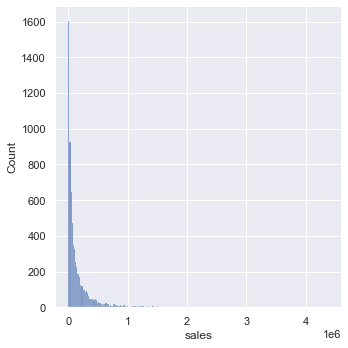

In [138]:
# Making a raw histogram confirms that.
sns.displot(data, x="sales")

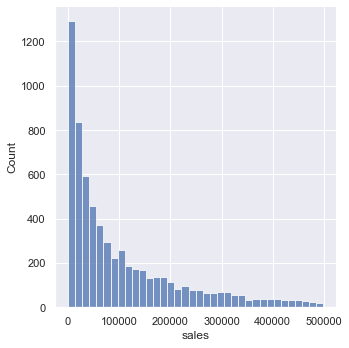

In [139]:
# It may be interesting to remove large sales to better understand what's happening on the lower end of the distribution tail
sns.displot(data[data['sales'] < 500000], x="sales")

In [140]:
# Let's have a look at the zero sales movies. 
# Not a lot, they come from a crawling error => the webpage did not have this information
# Should we get rid of it (shouldn't affect that much our results) ?
data[data["sales"] == 0]

,year,title,id,sales,release_date,is_adult,is_part_of_collection,collection_name,budget,genres,original_language,overview,production_countries,languages,tagline,runtime,cast
184,2019,The Front Runner,18692,0,2019-01-16,False,False,None,0,"[Drame, Histoire]",en,"L’histoire vraie de Gary Hart, un jeune sénate...",[US],[en],"En 1988, Gary Hart allait devenir Président de...",113.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 6968..."
185,2019,Ayka,18915,0,2019-01-16,False,False,None,0,[Drame],ru,Ayka vient d'accoucher. Elle ne peut pas se pe...,"[DE, KZ, PL, RU]","[ru, kk, ky]",,109.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 5843..."
206,2019,Recep Ivedik 6,19806,0,2019-11-06,False,True,Recep İvedik - Saga,0,[Comédie],tr,,[TR],[tr],,110.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1441..."
209,2019,303,18369,0,2019-07-24,False,False,None,0,"[Drame, Romance, Comédie]",de,"Jan est convaincu que par nature, l’être humai...",[DE],[hu],,120.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 1327..."
215,2019,Salauds de pauvres,19397,0,2019-06-05,False,False,None,0,[Comédie],fr,"Salauds de pauvres est un film à sketches, écr...",[],[],,106.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 2862..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,2018,Hard Eight,3608,0,2018-11-21,False,False,None,3000000,"[Drame, Thriller]",en,John a perdu tout son argent. Il rencontre Syd...,[US],[en],,102.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 4492..."
6541,2017,Voyage of Time : Au fil de la vie,16300,0,2017-05-04,False,False,None,0,"[Documentaire, Drame]",en,"Hymne à la nature et à l’univers, Voyage of Ti...","[DE, US, FR]",[en],,90.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 112,..."
6600,2018,Ma fille,18333,0,2018-09-12,False,False,None,0,"[Drame, Crime]",fr,"Un jour de juillet 1982, André Bamberski appre...",[FR],"[en, fr, de]",,87.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 6012..."
6663,2017,Seule la terre,17623,0,2017-12-06,False,False,None,0,"[Romance, Drame]",en,Johnny travaille du matin au soir dans la ferm...,[GB],"[en, ro]",,104.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1206..."


In [141]:
print('Percentage of movies with no sales ', round(len(data[data["sales"] == 0]) / len(data)*100,2), '%')

Percentage of movies with no sales  2.68 %


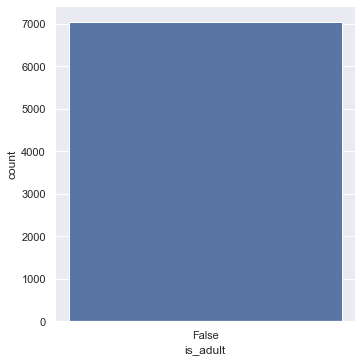

In [142]:
# Now let's explore other features. There do not seems to be any adult movie, this feature won't be useful
sns.catplot(x="is_adult", data=data, kind="count")

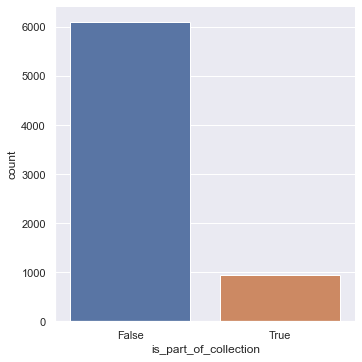

In [143]:
# A significant part of movies come from collections
# It'll be interesting to use this feature 
# - As a simple flag (sequel / prequel may be important to predict sales)
# - By encoding in a way the collection name (some collections may have more impact than others)
# - By using the collection previous sales (to guide even more our algorithm)
sns.catplot(x="is_part_of_collection", data=data, kind="count")

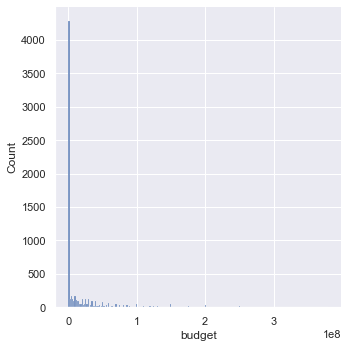

In [144]:
# Budget has a lot of zeros which seems unlikely => we'll need to fill in that variable in a way or another
sns.displot(data, x="budget")

In [145]:
print('Percentage of movies with no sales ', round(len(data[data["budget"] == 0]) / len(data)*100,2), '%')

Percentage of movies with no sales  58.33 %


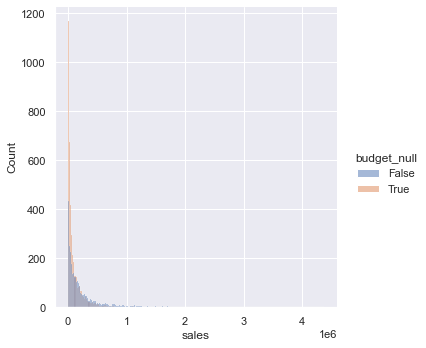

In [146]:
data['budget_null'] = data['budget'].map(lambda x: x == 0)
sns.displot(data, x="sales", hue='budget_null')

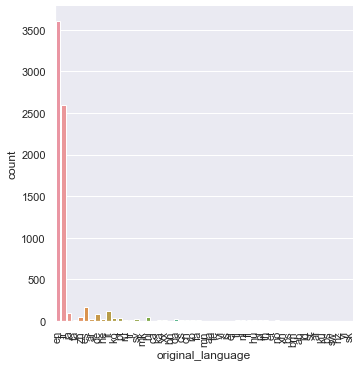

In [147]:
# Large part of english movies, followed by french movies. The rest of languages are way behind
plot = sns.catplot(x="original_language", data=data, kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

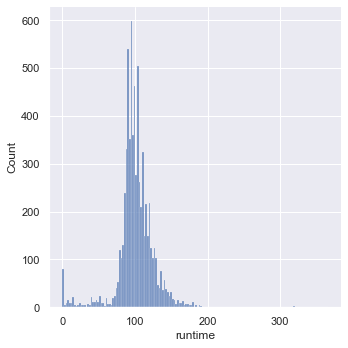

In [148]:
# Runtime seems legit => somehow a gaussian around 1 hour and a half. Some zeros however that we should preprocess next
# in a way or another
sns.displot(data, x="runtime")

In [149]:
# For genres, languages, production countries, data comes in list for each movie, 
# we should preprocess these columns before plotting them. Here we flatten the lists into a bigger Series

def flatten_list_series(column: pd.Series) -> pd.DataFrame:
    flattened_series = column.apply(pd.Series).stack().reset_index(drop=True)
    flattened_series.name = column.name
    return pd.DataFrame(flattened_series)

print(flatten_list_series(data['genres']))

            genres
0      Fantastique
1         Familial
2         Aventure
3          Comédie
4            Drame
...            ...
14858      Comédie
14859        Drame
14860      Romance
14861        Drame
14862      Comédie

[14863 rows x 1 columns]


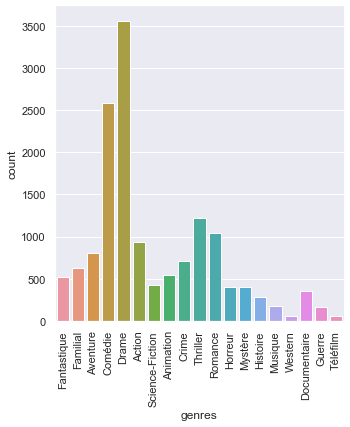

In [150]:
# When filled in, genres variable seems to be quite clean.
plot = sns.catplot(x='genres', data=flatten_list_series(data['genres']), kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [151]:
# There are a lot of available languages for these movies 
# => if we want to use this variable, we should maybe compress it (using embeddings ?) 
# instead of using a raw one hot encoding
languages = flatten_list_series(data['languages'])
languages['languages'].value_counts()

en    3853
fr    2911
es     549
de     410
it     382
      ... 
mk       1
cr       1
lo       1
to       1
oc       1
Name: languages, Length: 104, dtype: int64

In [152]:
# Same for production countries
countries = flatten_list_series(data['production_countries'])
countries['production_countries'].value_counts()

FR    2944
US    2886
GB     769
DE     533
BE     431
      ... 
ME       1
GH       1
IQ       1
NA       1
PY       1
Name: production_countries, Length: 124, dtype: int64

In [153]:
# Learnings

#   - A small part of data seems corrupted (sales = 0) => should we still use it (true sales were low anyhow) or get rid of it ?
#   - Some variables have missing values (runtime and budget) => how do we fill in these variables (simple mean or median, more custom techniques)
#   - Some variables have no variance (is_adult) => we cannot use them
#   - Some variables (original_language) are perfect for one hot encoding
#   - Some variables are multilabelled (genres) => we should multilabel encode them
#   - Some variables are multilabelled (languages, production_countries) but with large cardinality => we should find a smart way to encode them 

# Not analyzed yet:
#   - NA data (where, can we fill it in?)
#   - Textual data (title, overview, tagline)
#   - More complex data (cast, production companies). We should maybe analyse prod companies countries, how much some produce a same movie / and also analyse actors information : gender, make embeddings of actors..;